## 1: Import Libraries
#### In this step, we import the essential Python libraries for data analysis and visualization.
pandas is used for handling the data, matplotlib and seaborn for data visualization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2: Load Dataset
#### We now load the dataset from the Excel file and display the first few rows to understand its structure.

In [4]:
# Load dataset (make sure the file is in the same folder as notebook)
df = pd.read_excel("Online Retail.xlsx", sheet_name="Online Retail")

# Show first few rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 3: Check Dimensions and Data Types
#### This step helps us understand the size of the dataset (rows and columns) and the types of each feature — which is important for planning cleaning and analysis steps.


In [5]:
# Shape of dataset (rows, columns)
print("Dataset shape:", df.shape)

# Data types of each column
print("\nData types:\n", df.dtypes)


Dataset shape: (541909, 8)

Data types:
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


## 4: Check for Missing Values
#### Detecting missing values is crucial because they can affect analysis and model performance. We'll identify which columns contain missing data and how much.

In [6]:
# Count missing values in each column
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
### 5: Check for Duplicates
#### Duplicate entries can skew the analysis (like counting sales twice). We check for and remove any duplicate rows here.

In [8]:
# Number of duplicate rows
print("Number of duplicates:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)


Number of duplicates: 5268
Shape after dropping duplicates: (536641, 8)


## 6: Analyze Categorical & Numerical Columns
#### We separate columns into categorical (like Country, InvoiceNo) and numerical (like Quantity, UnitPrice), which helps in choosing the right visualizations and analyses.

In [9]:
# Categorical columns info
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_cols))

# Numerical columns info
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", list(numerical_cols))

# Unique counts in categorical columns
print("\nUnique values in categorical columns:")
print(df[categorical_cols].nunique())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df[numerical_cols].describe())


Categorical columns: ['InvoiceNo', 'StockCode', 'Description', 'Country']
Numerical columns: ['Quantity', 'UnitPrice', 'CustomerID']

Unique values in categorical columns:
InvoiceNo      25900
StockCode       4070
Description     4223
Country           38
dtype: int64

Summary statistics for numerical columns:
            Quantity      UnitPrice     CustomerID
count  536641.000000  536641.000000  401604.000000
mean        9.620029       4.632656   15281.160818
std       219.130156      97.233118    1714.006089
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13939.000000
50%         3.000000       2.080000   15145.000000
75%        10.000000       4.130000   16784.000000
max     80995.000000   38970.000000   18287.000000


## 7: Grouping and Aggregations
#### Before visualizing, we prepare aggregated data to extract business insights like revenue per country, customer, and product.

In [10]:
# Calculate revenue per row
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Group by country: total revenue
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Group by customer: total revenue
customer_revenue = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)

# Group by product: total quantity sold
product_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)


## 8: Visualizations
#
### (a) Top-selling Countries
#### A bar plot to show which countries have the most transactions — useful for identifying key international markets.

C:\Users\kumar\AppData\Local\Temp\ipykernel_11960\3540922635.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


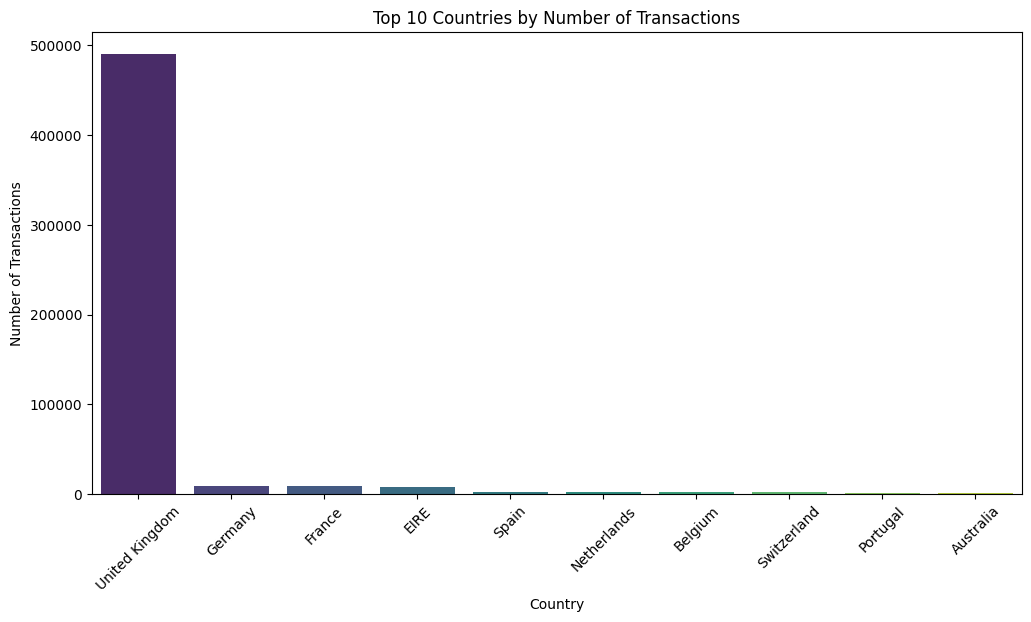

In [11]:
plt.figure(figsize=(12,6))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title("Top 10 Countries by Number of Transactions")
plt.ylabel("Number of Transactions")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()


### (b) Top Customers by Revenue
#### This chart highlights the top 10 customers by their total contribution to revenue — useful for business focus.

C:\Users\kumar\AppData\Local\Temp\ipykernel_11960\845421594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="magma")


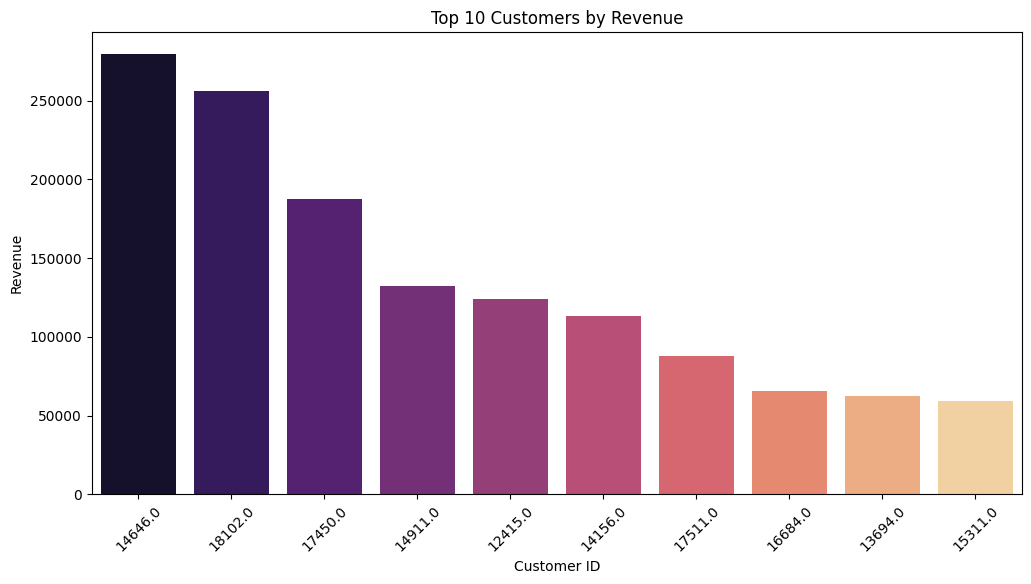

In [12]:
plt.figure(figsize=(12,6))
top_customers = customer_revenue.head(10)
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="magma")
plt.title("Top 10 Customers by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.show()


### (c) Most Sold Products
#### This bar chart helps identify which products are most frequently sold, regardless of price — useful for inventory management.

C:\Users\kumar\AppData\Local\Temp\ipykernel_11960\796345726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


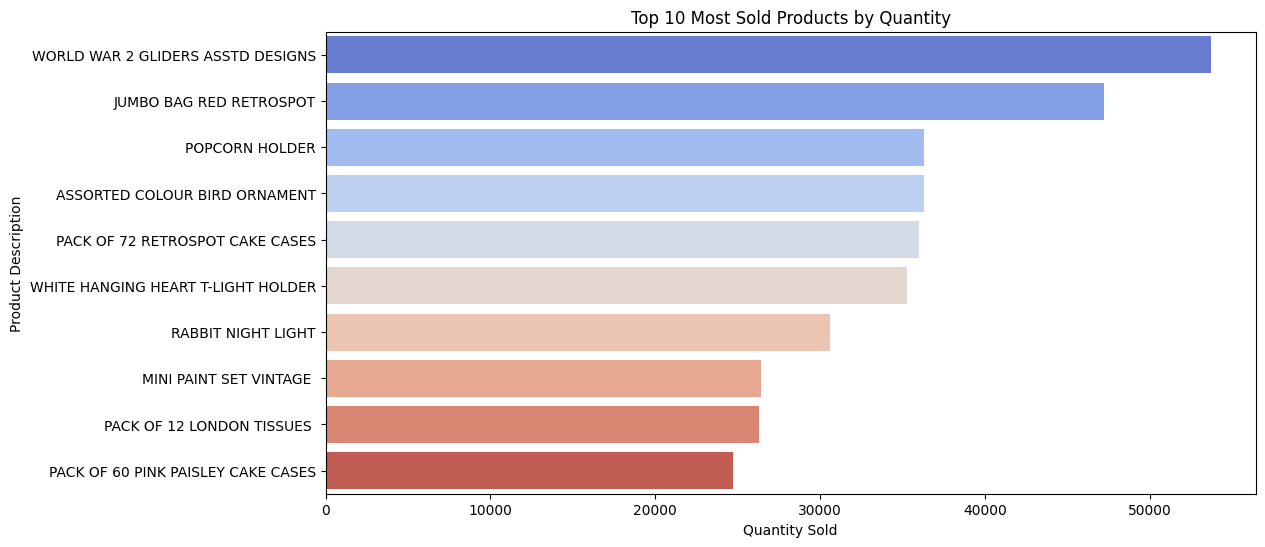

In [13]:
plt.figure(figsize=(12,6))
top_products = product_quantity.head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("Top 10 Most Sold Products by Quantity")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Description")
plt.show()


### (d) Time-based Trends (Monthly Sales)
#### By plotting sales revenue over time (monthly), we can detect seasonal trends or sales drops, helping guide strategy.

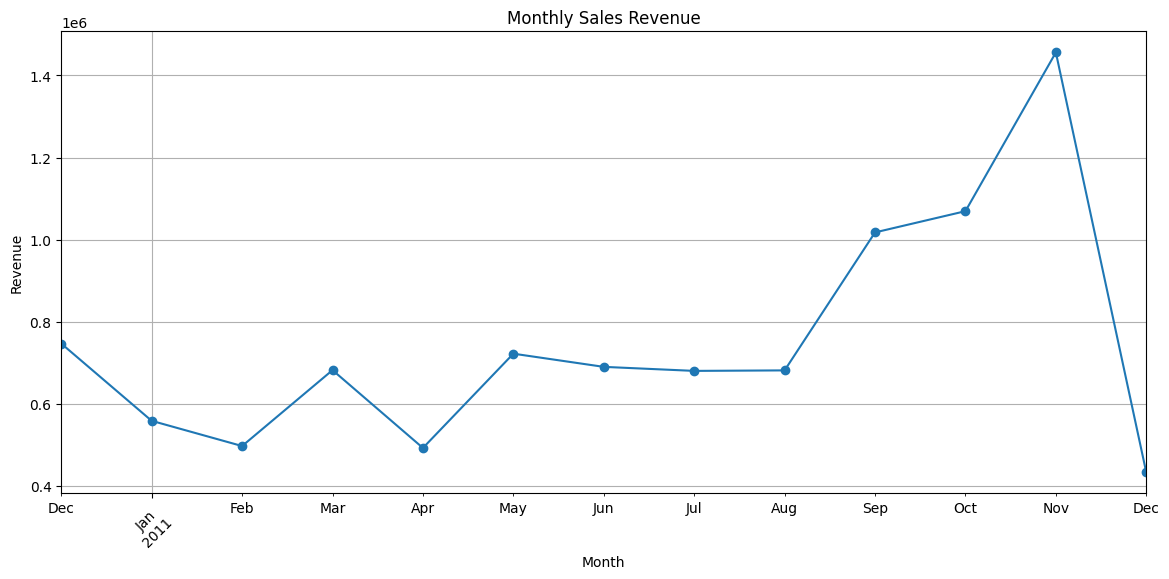

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(14,6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Revenue")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
